# New heading

In [2]:
from py2neo import Graph

In [3]:
from py2neo import Graph
graph = Graph("http://54.197.113.8:33354/browser/", username="neo4j", password="command-needs-bell")

In [27]:
query = "\
MATCH ((di:Disease) \
RETURN di LIMIT 10 \
"
results = graph.run(query)
df = results.to_data_frame()

In [45]:
query = "\
MATCH (t:Target)-[:RELATED_TO]-(di:Disease)-[:ACTS_ON]-(d:Drug) \
WITH d, COUNT(DISTINCT t) as nt \
RETURN nt, COUNT(*) ORDER BY nt ASC \
"
results = graph.run(query)
df = results.to_data_frame()

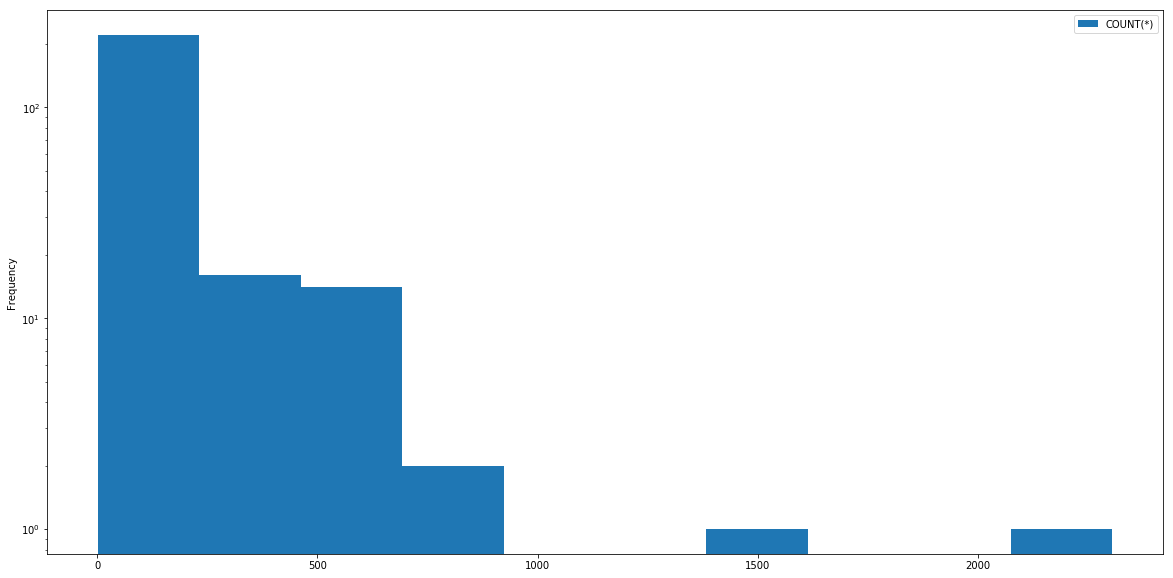

In [52]:
df.plot(x="nt", y="COUNT(*)", kind='hist', figsize=(20,10),logy=True )